# Numerical Variables


The numerical variables in the data set are:
* LotFrontage
* LotArea
* MasVnrArea
* BsmtFinSF1
* **BsmtFinSF2**
* BsmtUnfSF
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* **LowQualFinSF**
* GrLivArea
* **KitchenAbvGr**
* GarageArea
* WoodDeckSF
* OpenPorchSF
* **EnclosedPorch**
* **3SsnPorch**
* **ScreenPorch**
* **PoolArea**
* **MiscVal**

Of these, those shown in bold are only weakly correlated with the SalePrice, and will not be the subject of any additional analyses. I also won't be creating any specific analysis for TotalBsmtSF, since I won't be using it in the models, or any of the variables already analyzed above in the correlation section.

### Imports

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Data

In [9]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### Copying alterations from main Exploratory file

In [11]:
#Dropping those properties with above ground living area
#greater than 4000
index_drop = train[train["GrLivArea"] > 4000].index
train.drop(index = index_drop, inplace = True)
train.reset_index(drop = True, inplace = True)

In [12]:
#Merging 4 and 3 car garage levels
train.loc[train["GarageCars"] == 4, "GarageCars"] = 3

In [13]:
#Merging 0 and 1 full bath levels
train.loc[train["FullBath"] == 0, "FullBath"] = 1

In [14]:
#Merging all levels of total above ground rooms less than three into one
train.loc[train["TotRmsAbvGrd"] < 3, "TotRmsAbvGrd"] = 3
#merging all levels of total above ground rooms greater than 10 into one
train.loc[train["TotRmsAbvGrd"] >= 10, "TotRmsAbvGrd"] = 10

#### LotFrontage

Text(0, 0.5, 'Sales Price')

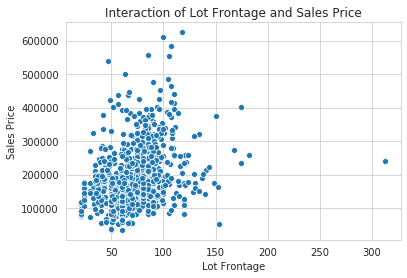

In [15]:
#Lotfrontage vs Sales Price Scatter plot
sns.scatterplot(train["LotFrontage"], train["SalePrice"])
plt.title("Interaction of Lot Frontage and Sales Price")
plt.xlabel("Lot Frontage")
plt.ylabel("Sales Price")

The majority of the observations follow a wide linear relationship, but there is one point which has an abonormally high amount lot frontage. Lot frontage is a measure of how many square feet of the lot are adjacent to the street. When I review the lot area below, I'll mark this point in orange to continue to observe its behavior.

#### LotArea

Text(0, 0.5, 'Sales Price')

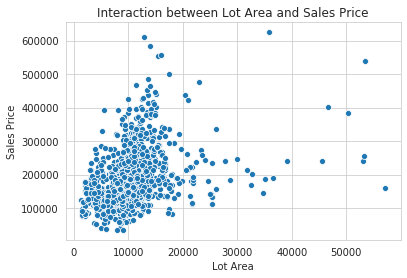

In [38]:
#Lot Area vs Sales Price Scatter plot
sns.scatterplot(train["LotArea"], train["SalePrice"])
plt.title("Interaction between Lot Area and Sales Price")
plt.xlabel("Lot Area")
plt.ylabel("Sales Price")

The relationship between sale pricce and lot area seems to be skewed heavily by the few abnormally large lots. I'll either be dropping these observations, as the weight they have on the relationship is disproportionate to their importance overall, or apply some sort of transformation to handle this behavior.

The observation above seen to have an abnormally high lot frontage doesn't have an incredibly large lot area.

In [45]:
index_drop = train[train["LotArea"] > 70000].index
train.drop(index = index_drop, inplace = True)

In [ ]:
#Lot Area vs Sales Price Scatter plot - Dropping Large Lots
sns.scatterplot(train["LotArea"], train["SalePrice"])
plt.title("Interaction between Lot Area and Sales Price")
plt.xlabel("Lot Area")
plt.ylabel("Sales Price")

#### MasVnrArea

Text(0, 0.5, 'Sales Price')

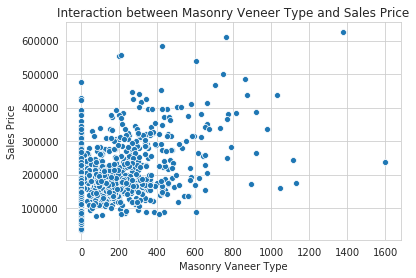

In [39]:
#Masonry Vaneer Area vs Sales Price
sns.scatterplot(train["MasVnrArea"], train["SalePrice"])
plt.title("Interaction between Masonry Veneer Type and Sales Price")
plt.xlabel("Masonry Vaneer Type")
plt.ylabel("Sales Price")

The relationship here, although there does seem to be a weeak one, is just that: weak. I do not believe that hte masonry vaneer area will have a strong impact on predicting the price.

#### BsmtFinSF1

Text(0, 0.5, 'Sales Price')

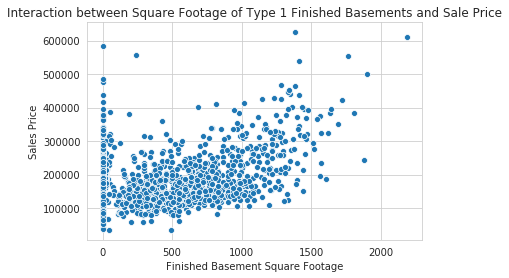

In [40]:
#Finished Basement Square Footage vs Sales Price
sns.scatterplot(train["BsmtFinSF1"], train["SalePrice"])
plt.title("Interaction between Square Footage of Type 1 Finished Basements and Sale Price")
plt.xlabel("Finished Basement Square Footage")
plt.ylabel("Sales Price")

The amount of finished basement square footage seems to have a weak positive correlation with the sales price.

#### BsmtUnfSF

Text(0, 0.5, 'Sales Price')

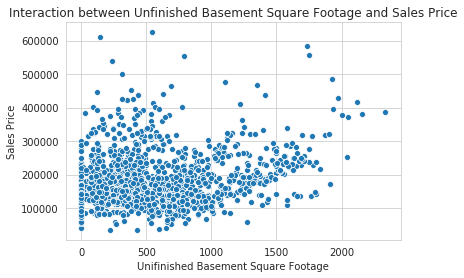

In [41]:
#Interaction of Unfinished Basement SqF and Sales Price
sns.scatterplot(train["BsmtUnfSF"], train["SalePrice"])
plt.title("Interaction between Unfinished Basement Square Footage and Sales Price")
plt.xlabel("Unifinished Basement Square Footage")
plt.ylabel("Sales Price")

The relationship here is even weaker than the one for finished basements.

#### 2ndFlrSF

Text(0, 0.5, 'Sales Price')

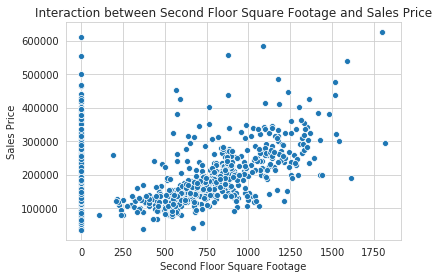

In [42]:
#Interaction between the SQF of the 2nd Floor and Sales Price
sns.scatterplot(train["2ndFlrSF"], train["SalePrice"])
plt.title("Interaction between Second Floor Square Footage and Sales Price")
plt.xlabel("Second Floor Square Footage")
plt.ylabel("Sales Price")

Excluding those houses which have no second floor, there is a clear positive linear relationship between the size of the second floor and the sales price.

#### WoodDeckSF

Text(0, 0.5, 'Sales Price')

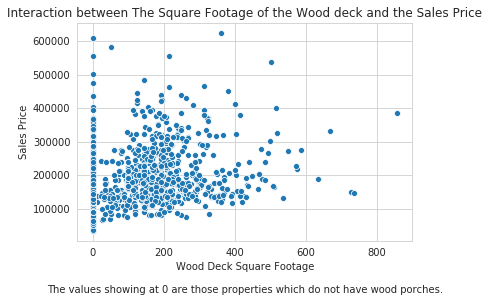

In [43]:
#Interaction bewteen the SQF of the Wood deck (if present) and the sales price
sns.scatterplot(train["WoodDeckSF"], train["SalePrice"])
plt.xlabel("""Wood Deck Square Footage\n
The values showing at 0 are those properties which do not have wood porches.""")
plt.title("Interaction between The Square Footage of the Wood deck and the Sales Price")
plt.ylabel("Sales Price")

Honestly, I'm suprised at how many properties have wood decks, although having grown up in California may be baising that reaction somewhat. There is a clear relationship between the deck size and tha sale price, but the variance is clearly increase as those two values increase, which is worrisome for any models I would build.

#### OpenPorchSF

Text(0, 0.5, 'Sales Price')

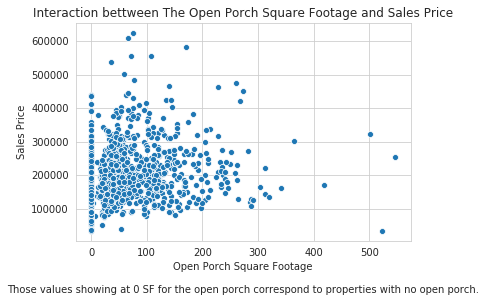

In [44]:
#Interaction between Sales Price and Open Porch size
sns.scatterplot(train["OpenPorchSF"], train["SalePrice"])
plt.xlabel("""Open Porch Square Footage\n
Those values showing at 0 SF for the open porch correspond to properties with no open porch.""")
plt.title("Interaction bettween The Open Porch Square Footage and Sales Price")
plt.ylabel("Sales Price")

There is a relationship here, but it is weaker than that seen in for the wood decks. 